# Trabajo de Predicción
El objetivo de este trabajo consiste en aplicar la técnica de Random Forest utilizando un archivo con datos acerca de los clicks recibidos desde un portal metabuscador de hoteles. De esta manera, se podrán predecir si estas búsquedas terminan o no en una reserva consolidada.

# Lectura y Visualización de Datos
Lo primero que se realiza es la lectura de los datos proporcionados. Además, se visualizarán algunos de los datos de los que se compone el archivo, de tal manera que se puedan comprender los mismos.

In [1]:
# Importación del paquete Pandas para la lectura del archivo.
import pandas as pd

In [2]:
# Carga del archivo con los datos.
data = pd.read_csv("./clicks.csv")

In [3]:
# Visualización de los primeros elementos.
data.head(5)

,date,remite_id,checkin,checkout,adults,children,hotel_id,sale
0,2016-04-01,89,2016-04-18,2016-04-26,2,0,255858,0
1,2016-04-01,89,2016-05-27,2016-05-28,2,2,80563,0
2,2016-04-01,89,2016-06-18,2016-06-19,2,0,165762,0
3,2016-04-01,89,2016-06-18,2016-06-19,2,0,165762,0
4,2016-04-01,89,2016-07-13,2016-08-20,2,0,849,0


In [4]:
print ("Características iniciales: " + str(len(data.columns)))
print ("Elementos totales: " + str(len(data.index)))

Características iniciales: 8
Elementos totales: 158161


In [5]:
# Visualización de los tipos de datos contenidos en el archivo.
data.dtypes

date         object
remite_id     int64
checkin      object
checkout     object
adults        int64
children      int64
hotel_id      int64
sale          int64
dtype: object

In [6]:
# Visualización de las variables junto con el total de los diferentes valores que toma cada una.

caracteristicas = data.columns

for caracteristica in caracteristicas:
    print ("Valores diferentes para la característica '" + caracteristica + "':")
    print (data[caracteristica].value_counts())

    if "sale" != caracteristica:
        print ("\n")

Valores diferentes para la característica 'date':
2016-04-04    25001
2016-04-01    24225
2016-04-05    23563
2016-04-03    23552
2016-04-06    22394
2016-04-07    20342
2016-04-02    19084
Name: date, dtype: int64


Valores diferentes para la característica 'remite_id':
27     126015
130     15892
89      13912
316      1645
317       697
Name: remite_id, dtype: int64


Valores diferentes para la característica 'checkin':
2016-04-24    9026
2016-04-09    4768
2016-04-08    4479
2016-04-10    3882
2016-04-30    3270
2016-04-29    3235
2016-04-22    3122
2016-04-17    2966
2016-04-15    2910
2016-04-23    2689
2016-04-16    2621
2016-04-02    2260
2016-05-01    2235
2016-05-13    2094
2016-08-01    2093
2016-05-14    2061
2016-04-05    1974
2016-04-07    1935
2016-04-03    1761
2016-05-06    1667
2016-07-04    1631
2016-07-18    1607
2016-05-07    1557
2016-08-08    1532
2016-08-15    1501
2016-04-11    1438
2016-04-06    1413
2016-08-22    1388
2016-07-01    1315
2016-05-27    1259
   

Como se puede observar, existe un total de 8 características y 158.161 elementos dentro del archivo proporcionado. Como se describe en el enunciado, las características son las siguientes:
   - date (objeto). Fecha del click (acotado a una semana, como se ve en los resultados anteriores)
   - remite_id (int64). Mercado geográfico del portal.
   - checkin (objeto). Fecha de checkin en la búsqueda.
   - checkout (objeto). Fecha de checkout en la búsqueda.
   - adultos (int64). Número de adultos en la búsqueda.
   - children (int64). Número de niñis en la búsqueda.
   - hotel_id (int64). Hotel en el que se ha hecho click.
   - sale (int64). Si el click resultó en una reserva (1) o no (0).

Además, no existen datos nulos en el archivo, por lo que no será necesario su tratamiento antes de trabajar con los datos.

In [7]:
# Obtención de datos estadísticos de las variables cuantitativas iniciales.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
remite_id,158161.0,47.086842,47.328124,27.0,27.0,27.0,27.0,317.0
adults,158161.0,2.016970,0.397708,1.0,2.0,2.0,2.0,5.0
children,158161.0,0.469819,0.786577,0.0,0.0,0.0,1.0,4.0
hotel_id,158161.0,125089.567295,97022.122353,4.0,4676.0,151728.0,192149.0,398894.0
sale,158161.0,0.019543,0.138425,0.0,0.0,0.0,0.0,1.0


# Tratamiento y Graficado de los Datos Iniciales

In [8]:
# Importación de paquetes necesarios para la representación gráfica de los datos.
import matplotlib.pyplot as plt
import seaborn as sb

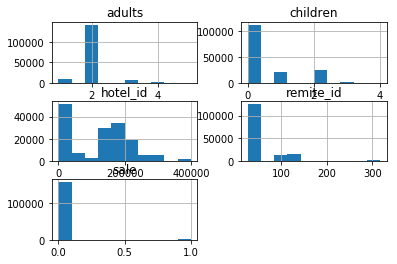

In [9]:
# Visualización de los valores del dataset
data.hist()
plt.show()